##Importação do *dataset*

In [ ]:
import pandas as pd

dados = pd.read_csv('pre-processed.csv')

#separação dos dados:
X = dados['preprocessed_news']
y = dados['label']
dados

,index,label,preprocessed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,fake,radialista americano fala sobre pt vendem ilus...
...,...,...,...
7195,7195,true,jornal britanico acao contra lula lava jato se...
7196,7196,true,temer diz acionou pf cade investigar aumentos ...
7197,7197,true,obstaculos politicos temer especialistas ouvid...
7198,7198,true,setembro boa noite aqui estao principais notic...


##Visualização da distribuição de classes no *dataset*

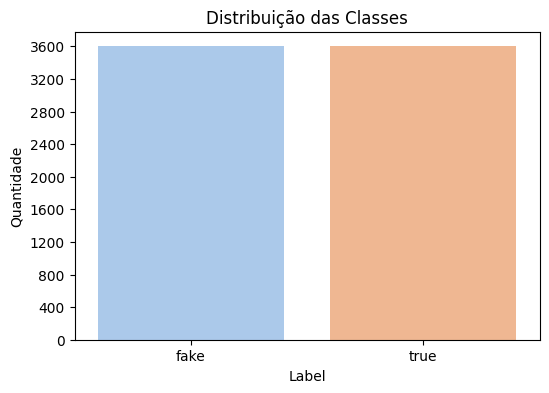

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
sns.countplot(x=y, hue=y, palette='pastel', legend=False)
plt.title("Distribuição das Classes")
plt.xlabel("Label")
plt.ylabel("Quantidade")
plt.yticks(np.arange(0, 3601, 400))
plt.show()

##Bibliotecas usadas:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB # naive_bayes
from sklearn.svm import LinearSVC # SVM
from sklearn.metrics import accuracy_score, confusion_matrix
import time # tempo de execução dos algoritmos

##Separação dos dados, sendo 70% para treino e 30% para teste:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13) #30% para teste

#1. K-nearest neighbors (KNN):

In [ ]:
print("========= K-nearest neighbors (KNN) =========")

========= K-nearest neighbors (KNN) =========


## - Vetorização usada: *Bag-of-words*



In [ ]:
# usando bag of words
bag_vetor = CountVectorizer()
X_train_bag = bag_vetor.fit_transform(X_train)
X_test_bag = bag_vetor.transform(X_test)

Treino:

In [ ]:
start = time.time() #tempo do treino
knn_bag = KNeighborsClassifier(n_neighbors=3)
knn_bag.fit(X_train_bag, y_train)
treino_knn_bow = time.time() - start #tempo do treino

Teste (Predição):

In [ ]:
start = time.time() #tempo do teste
y_pred_bag = knn_bag.predict(X_test_bag)
teste_knn_bow = time.time() - start #tempo do teste

Acurácia:

In [ ]:
#calcular acuracia:
acuracia_knn_bow = accuracy_score(y_test, y_pred_bag)
print("Acurácia do KNN usando bag-of-words:", acuracia_knn_bow)

Acurácia do KNN usando bag-of-words: 0.7046296296296296


Matriz de confusão:

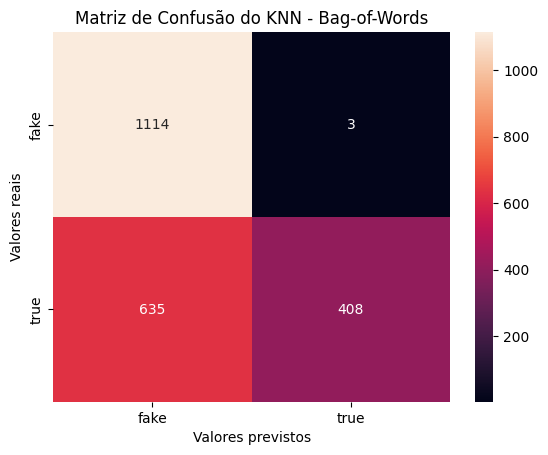

In [ ]:
#matriz de confusão
mc_bag = confusion_matrix(y_test, y_pred_bag, labels=knn_bag.classes_)
sns.heatmap(mc_bag, annot=True, fmt="d", xticklabels=knn_bag.classes_, yticklabels=knn_bag.classes_)
plt.title("Matriz de Confusão do KNN - Bag-of-Words")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

## - Vetorização usada: TF-IDF

In [ ]:
#usando TF-IDF
tfidf_vetor = TfidfVectorizer()
X_train_tfidf = tfidf_vetor.fit_transform(X_train)
X_test_tfidf = tfidf_vetor.transform(X_test)

Treino:

In [ ]:
start = time.time() #tempo do treino
knn_tfidf = KNeighborsClassifier(n_neighbors=3)
knn_tfidf.fit(X_train_tfidf, y_train)
treino_knn_tfidf = time.time() - start #tempo do treino

Teste:

In [ ]:
start = time.time() #tempo do teste
y_pred_tfidf = knn_tfidf.predict(X_test_tfidf)
teste_knn_tfidf = time.time() - start #tempo do teste

Acurácia:

In [ ]:
#calcular acuracia:
acuracia_knn_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Acurácia do KNN usando TF-IDF:", acuracia_knn_tfidf)

Acurácia do KNN usando TF-IDF: 0.6893518518518519


Matriz de confusão:

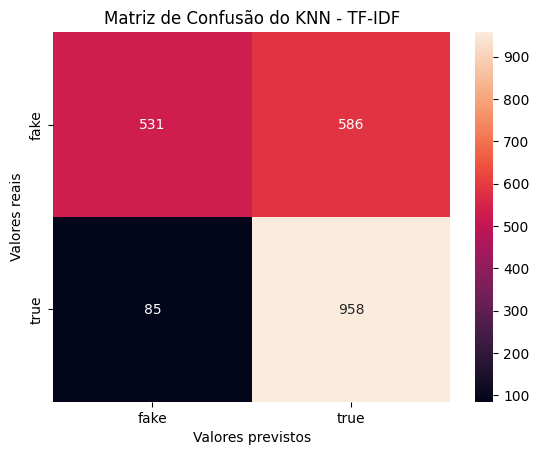

In [ ]:
#matriz de confusão
mc_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=knn_tfidf.classes_)
sns.heatmap(mc_tfidf, annot=True, fmt="d", xticklabels=knn_tfidf.classes_, yticklabels=knn_tfidf.classes_)
plt.title("Matriz de Confusão do KNN - TF-IDF")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

#2. Naive Bayes:

In [ ]:
print("============= Naive Bayes =============")

============= Naive Bayes =============


## - Vetorização usada: *Bag-of-words*

In [ ]:
# usando bag of words
bag_vetor = CountVectorizer()
X_train_bag = bag_vetor.fit_transform(X_train)
X_test_bag = bag_vetor.transform(X_test)

Treino:

In [ ]:
start = time.time() #tempo de treino
nb_bag = MultinomialNB()
nb_bag.fit(X_train_bag, y_train)
treino_nb_bow = time.time() - start #tempo do treino

Teste:

In [ ]:
start = time.time() #tempo do teste
y_pred_bag = nb_bag.predict(X_test_bag)
teste_nb_bow = time.time() - start #tempo do teste

Acurácia:

In [ ]:
#calcular acuracia:
acuracia_nb_bow = accuracy_score(y_test, y_pred_bag)
print("Acurácia do Naive Bayes usando bag-of-words:", acuracia_nb_bow)

Acurácia do Naive Bayes usando bag-of-words: 0.8199074074074074


Matriz de confusão:

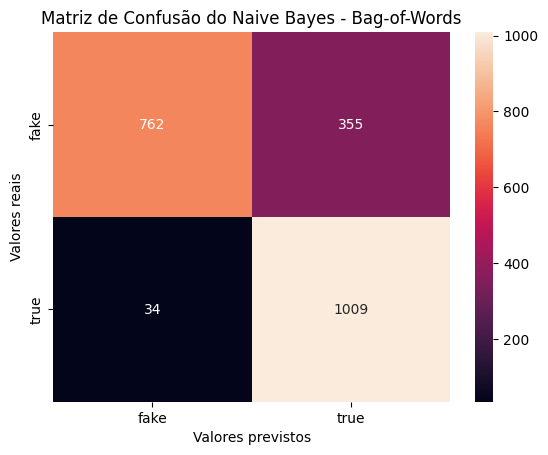

In [ ]:
#matriz de confusão
mc_bag = confusion_matrix(y_test, y_pred_bag, labels=nb_bag.classes_)
sns.heatmap(mc_bag, annot=True, fmt="d", xticklabels=nb_bag.classes_, yticklabels=nb_bag.classes_)
plt.title("Matriz de Confusão do Naive Bayes - Bag-of-Words")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

## - Vetorização usada: TF-IDF

In [ ]:
#usando TF-IDF
tfidf_vetor = TfidfVectorizer()
X_train_tfidf = tfidf_vetor.fit_transform(X_train)
X_test_tfidf = tfidf_vetor.transform(X_test)

Treino:

In [ ]:
start = time.time() #tempo de treino
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
treino_nb_tfidf = time.time() - start #tempo do treino

Teste:

In [ ]:
start = time.time() #tempo de teste
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
teste_nb_tfidf = time.time() - start #tempo do teste

Acurácia:

In [ ]:
#calcular acuracia:
acuracia_nb_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Acurácia do Naive Bayes usando TF-IDF:", acuracia_nb_tfidf)

Acurácia do Naive Bayes usando TF-IDF: 0.5925925925925926


Matriz de confusão:

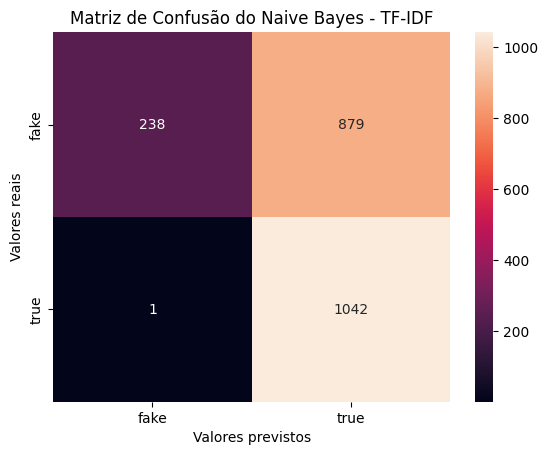

In [ ]:
#matriz de confusão
mc_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=nb_tfidf.classes_)
sns.heatmap(mc_tfidf, annot=True, fmt="d", xticklabels=nb_tfidf.classes_, yticklabels=nb_tfidf.classes_)
plt.title("Matriz de Confusão do Naive Bayes - TF-IDF")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

#3. Support Vector Machine (SVM)

In [ ]:
print("============= SVM =============")

============= SVM =============


## - Vetorização usada: *Bag-of-words*

In [ ]:
# usando bag of words
bag_vetor = CountVectorizer()
X_train_bag = bag_vetor.fit_transform(X_train)
X_test_bag = bag_vetor.transform(X_test)

Treino:

In [ ]:
start = time.time() #tempo do treino
svm_bag = LinearSVC()
svm_bag.fit(X_train_bag, y_train)
treino_svm_bow = time.time() - start #tempo do treino

Teste:

In [ ]:
start = time.time() #tempo do teste
y_pred_bag = svm_bag.predict(X_test_bag)
teste_svm_bow = time.time() - start #tempo do teste

Acurácia:

In [ ]:
#calcular acuracia:
acuracia_svm_bow = accuracy_score(y_test, y_pred_bag)
print("Acurácia do SVM usando bag-of-words:", acuracia_svm_bow)

Acurácia do SVM usando bag-of-words: 0.9574074074074074


Matriz de confusão:

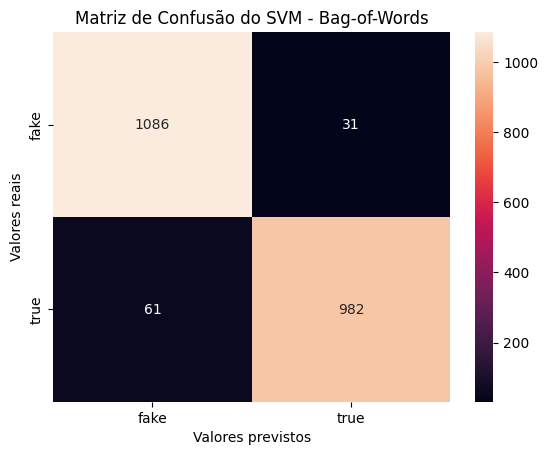

In [ ]:
#matriz de confusão
mc_bag = confusion_matrix(y_test, y_pred_bag, labels=svm_bag.classes_)
sns.heatmap(mc_bag, annot=True, fmt="d", xticklabels=svm_bag.classes_, yticklabels=svm_bag.classes_)
plt.title("Matriz de Confusão do SVM - Bag-of-Words")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

## - Vetorização usada: TF-IDF

In [ ]:
#usando TF-IDF
tfidf_vetor = TfidfVectorizer()
X_train_tfidf = tfidf_vetor.fit_transform(X_train)
X_test_tfidf = tfidf_vetor.transform(X_test)

Treino:

In [ ]:
start = time.time() #tempo do treino
svm_tfidf = LinearSVC()
treino_svm_tfidf = time.time() - start #tempo do treino

Teste:

In [ ]:
svm_tfidf.fit(X_train_tfidf, y_train)
start = time.time() #tempo do teste
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
teste_svm_tfidf = time.time() - start #tempo do teste

Acurácia:

In [ ]:
#calcular acuracia:
acuracia_svm_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Acurácia do SVM usando TF-IDF:", acuracia_svm_tfidf)

Acurácia do SVM usando TF-IDF: 0.9574074074074074


Matriz de confusão:

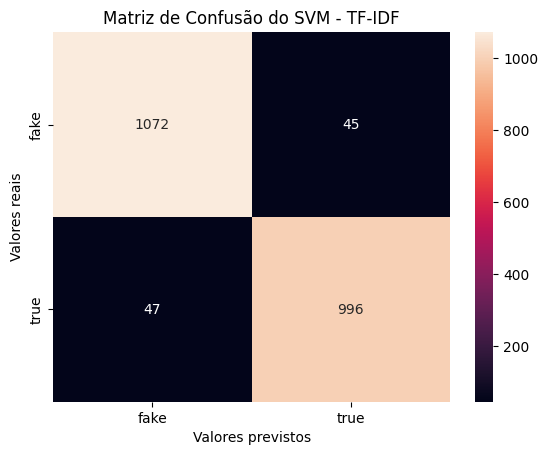

In [ ]:
#matriz de confusão
mc_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=svm_tfidf.classes_)
sns.heatmap(mc_tfidf, annot=True, fmt="d", xticklabels=svm_tfidf.classes_, yticklabels=svm_tfidf.classes_)
plt.title("Matriz de Confusão do SVM - TF-IDF")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

# 4. BERT (Bidirectional Encoder Representations from Transformers)

In [ ]:
print("============= BERT =============")

============= BERT =============


### ⚠️ Aviso:

Devido a problemas de compatibilidade com versões mais novas do TensorFlow, foi utilizado uma versão mais antiga.  
A biblioteca Pytorch (criada e mantida pela Meta) seria mais recomendado nesse caso

Um dos avisos dados:
> TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.

Além disso, eu pessoalmente recomendo rodar o BERT após o resto dos modelos, devido ao uso do Keras em uma versão anterior

### Configuração de ambiente para o BERT

In [ ]:
# Para instalar uma versão compatível do tf_keras
!pip install tf_keras

# Garantindo a importação de algumas bibliotecas
import os

# Força o TensorFlow a usar a versão Keras 2 (instalada acima)
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
# --- Configuração Inicial e Carregamento de Dados ---
print("Carregando o arquivo pre-processed.csv...")
dados = pd.read_csv('pre-processed.csv')

# Verificação e limpeza de dados
print("Verificando e limpando os dados...")
dados.dropna(subset=['preprocessed_news', 'label'], inplace=True)
dados['preprocessed_news'] = dados['preprocessed_news'].astype(str)

X = dados['preprocessed_news']
y = dados['label']

# Mapeando os labels para inteiros
label_map = {label: i for i, label in enumerate(np.unique(y))}
y_numeric = y.map(label_map).values
num_labels = len(label_map)

# Separação dos dados
X_train, X_temp, y_train, y_temp = train_test_split(X, y_numeric, test_size=0.4, random_state=13, stratify=y_numeric)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=13, stratify=y_temp)
print(f"Dataset dividido em: {len(X_train)} amostras de treino, {len(X_val)} de validação e {len(X_test)} de teste.")

Carregando o arquivo pre-processed.csv...
Verificando e limpando os dados...
Dataset dividido em: 4320 amostras de treino, 720 de validação e 2160 de teste.


In [ ]:
# --- Carregamento do Modelo e Tokenizador BERT ---
print("\nCarregando o tokenizador e o modelo BERT pré-treinado...")
model_name = 'neuralmind/bert-base-portuguese-cased' # Usando um modelo em português
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


Carregando o tokenizador e o modelo BERT pré-treinado...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/529M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenização dos textos
def tokenize_data(texts, tokenizer, max_length=128):
    return tokenizer(list(texts), max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')

print("Tokenizando os dados... (Isso pode levar alguns minutos)")
train_encodings = tokenize_data(X_train, tokenizer)
val_encodings = tokenize_data(X_val, tokenizer)
test_encodings = tokenize_data(X_test, tokenizer)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Tokenizando os dados... (Isso pode levar alguns minutos)


In [ ]:
# Criação de datasets TensorFlow

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(1000).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), y_val)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(16)

print("Datasets do TensorFlow criados.")

Datasets do TensorFlow criados.


In [ ]:
# --- Compilação e Treino do Modelo ---
optimizer = Adam(learning_rate=3e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('acuracia_bert')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
print("\n============= BERT =============")
print("Iniciando o treinamento do modelo BERT...")
start_time_train = time.time()
history = model.fit(train_dataset, epochs=3, validation_data=val_dataset) # Somente 3 iterações
end_time_train = time.time()
treino_bert = end_time_train - start_time_train
print(f"Tempo de treino do BERT: {treino_bert:.2f} segundos")

# --- Avaliação do Modelo ---
print("\nAvaliando o modelo BERT no conjunto de teste...")
start_time_test = time.time()
loss, acuracia_bert = model.evaluate(test_dataset)
end_time_test = time.time()
teste_bert = end_time_test - start_time_test
print(f"Tempo de teste do BERT: {teste_bert:.2f} segundos")
print(f"Acurácia do BERT no conjunto de teste: {acuracia_bert:.4f}")


============= BERT =============
Iniciando o treinamento do modelo BERT...
Epoch 1/3
270/270 [==============================] - 189s 468ms/step - loss: 0.3641 - acuracia_bert: 0.8313 - val_loss: 0.1620 - val_acuracia_bert: 0.9375
Epoch 2/3
270/270 [==============================] - 121s 449ms/step - loss: 0.1117 - acuracia_bert: 0.9581 - val_loss: 0.1721 - val_acuracia_bert: 0.9319
Epoch 3/3
270/270 [==============================] - 119s 442ms/step - loss: 0.0496 - acuracia_bert: 0.9824 - val_loss: 0.1357 - val_acuracia_bert: 0.9528
Tempo de treino do BERT: 473.04 segundos

Avaliando o modelo BERT no conjunto de teste...
135/135 [==============================] - 20s 146ms/step - loss: 0.1799 - acuracia_bert: 0.9407
Tempo de teste do BERT: 20.48 segundos
Acurácia do BERT no conjunto de teste: 0.9407


In [ ]:
# Salvando o modelo
if not os.path.exists('modelos'):
    os.makedirs('modelos')

model.save_pretrained('modelos/bert_model')
tokenizer.save_pretrained('modelos/bert_tokenizer')
print("\nModelo e tokenizador BERT foram salvos nos diretórios 'modelos/bert_model' e 'modelos/bert_tokenizer'")


Modelo e tokenizador BERT foram salvos nos diretórios 'modelos/bert_model' e 'modelos/bert_tokenizer'


Gerando predições e matriz de confusão...
135/135 [==============================] - 23s 146ms/step


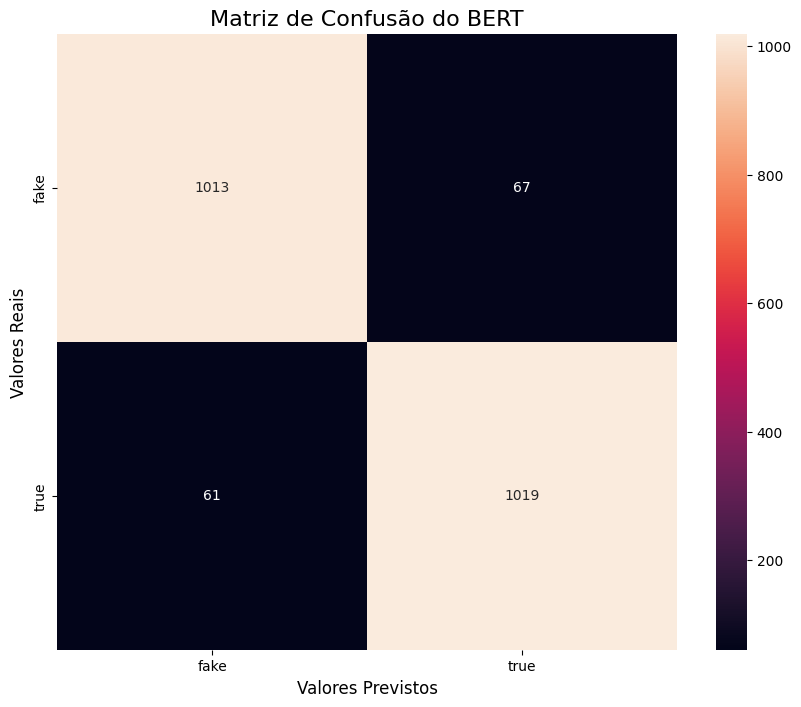

In [ ]:
# --- Predições e Matriz de Confusão ---
print("Gerando predições e matriz de confusão...")
y_pred_logits = model.predict(test_dataset).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()

mc_bert = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mc_bert, annot=True, fmt="d", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Matriz de Confusão do BERT", fontsize=16)
plt.xlabel("Valores Previstos", fontsize=12)
plt.ylabel("Valores Reais", fontsize=12)
plt.show()

#Gráfico de Comparação de Acurácia entre Modelos usados

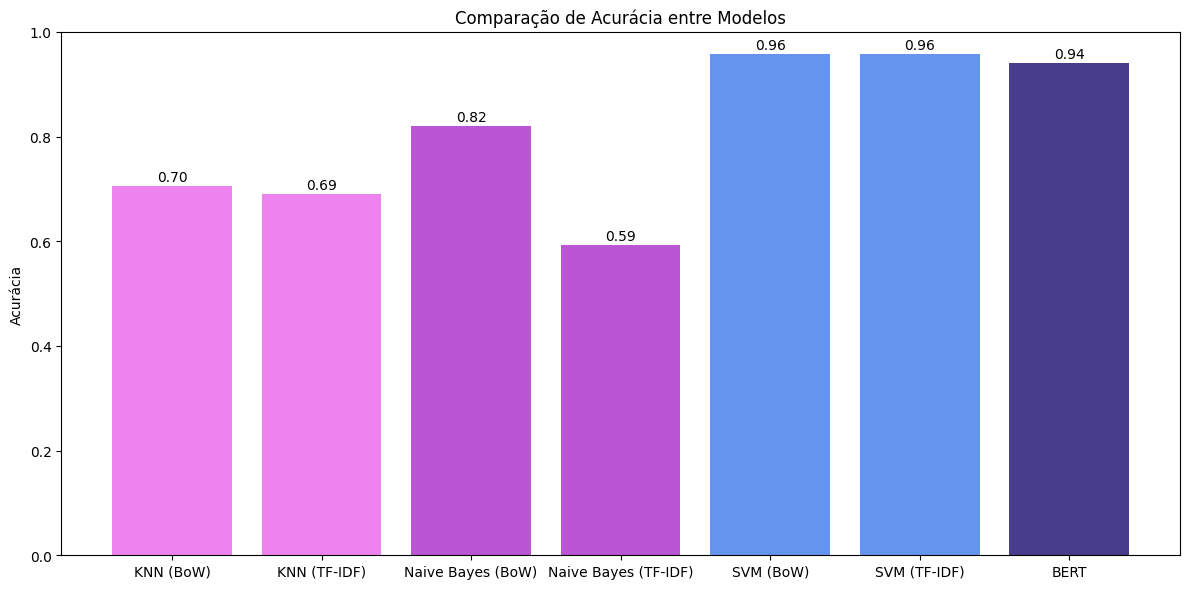

In [ ]:
acuracias = {
  'KNN (BoW)': acuracia_knn_bow,
  'KNN (TF-IDF)': acuracia_knn_tfidf,
  'Naive Bayes (BoW)': acuracia_nb_bow,
  'Naive Bayes (TF-IDF)': acuracia_nb_tfidf,
  'SVM (BoW)': acuracia_svm_bow,
  'SVM (TF-IDF)': acuracia_svm_tfidf,
  'BERT': acuracia_bert
}

cores = []
for modelo in acuracias.keys():
  if 'KNN' in modelo:
    cores.append('violet')   # rosa
  elif 'Naive Bayes' in modelo:
    cores.append('mediumorchid')  # roxo
  elif 'SVM' in modelo:
    cores.append('cornflowerblue')  # azul
  elif 'BERT' in modelo:
    cores.append('darkslateblue') # roxo escuro

plt.figure(figsize=(12, 6))
plt.bar(acuracias.keys(), acuracias.values(), color=cores)
plt.title('Comparação de Acurácia entre Modelos')
plt.ylabel('Acurácia')
plt.ylim(0, 1.0)

#valores no topo das barras:
for i, (modelo, valor) in enumerate(acuracias.items()):
  plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#Gráfico de comparação de tempos de execução entre modelos:

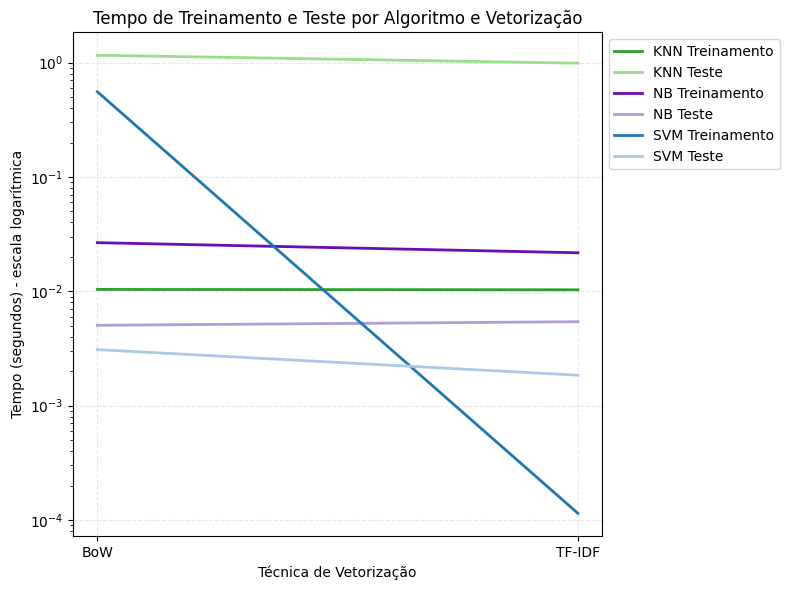

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

tecnicas = ['BoW', 'TF-IDF']
x = np.arange(len(tecnicas))

treino_nb = [treino_nb_bow, treino_nb_tfidf]
teste_nb = [teste_nb_bow, teste_nb_tfidf]

treino_knn = [treino_knn_bow, treino_knn_tfidf]
teste_knn = [teste_knn_bow, teste_knn_tfidf]

treino_svm = [treino_svm_bow, treino_svm_tfidf]
teste_svm = [teste_svm_bow, teste_svm_tfidf]

plt.figure(figsize=(10, 6))

plt.plot(x, treino_knn, label='KNN Treinamento', color='#2ca02c', linewidth=2) # verde
plt.plot(x, teste_knn, label='KNN Teste', color='#98df8a', linewidth=2)        # verde claro

plt.plot(x, treino_nb, label='NB Treinamento', color='#6a0dad', linewidth=2)   # roxo escuro
plt.plot(x, teste_nb, label='NB Teste',color='#b19cd9', linewidth=2)          # roxo claro

plt.plot(x, treino_svm, label='SVM Treinamento', color='#1f77b4', linewidth=2) # azul
plt.plot(x, teste_svm, label='SVM Teste', color='#aec7e8', linewidth=2)        # azul claro

plt.xticks(x, tecnicas)
plt.xlabel('Técnica de Vetorização')
plt.ylabel('Tempo (segundos) - escala logarítmica')
plt.title('Tempo de Treinamento e Teste por Algoritmo e Vetorização')

plt.grid(True, linestyle='--', alpha=0.3)

plt.yscale('log')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

## Exportação dos melhores modelos de cada método

In [ ]:
import pickle
import os

if not os.path.exists('modelos'):
    os.makedirs('modelos')

best_models = {}

best_models['KNN'] = {'model': knn_bag, 'vectorizer': bag_vetor, 'accuracy': acuracias['KNN (BoW)']}
best_models['Naive Bayes'] = {'model': nb_bag, 'vectorizer': bag_vetor, 'accuracy': acuracias['Naive Bayes (BoW)']}
best_models['SVM'] = {'model': svm_tfidf, 'vectorizer': tfidf_vetor, 'accuracy': acuracias['SVM (TF-IDF)']}

for model_name, model_info in best_models.items():
    model_filename = f'modelos/{model_name.lower().replace(" ", "_")}_model.pkl'
    with open(model_filename, 'wb') as f:
        pickle.dump(model_info['model'], f)
    print(f"Salvando modelo {model_name} em {model_filename}")

    vectorizer_filename = f'modelos/{model_name.lower().replace(" ", "_")}_vectorizer.pkl'
    with open(vectorizer_filename, 'wb') as f:
        pickle.dump(model_info['vectorizer'], f)
    print(f"Salvando {model_name} vetorizador em {vectorizer_filename}")

Salvando modelo KNN em modelos/knn_model.pkl
Salvando KNN vetorizador em modelos/knn_vectorizer.pkl
Salvando modelo Naive Bayes em modelos/naive_bayes_model.pkl
Salvando Naive Bayes vetorizador em modelos/naive_bayes_vectorizer.pkl
Salvando modelo SVM em modelos/svm_model.pkl
Salvando SVM vetorizador em modelos/svm_vectorizer.pkl
